In [1]:
# Importing Libraries
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as non_clustered_plt
import matplotlib.pyplot as clustered_plt
import matplotlib.pyplot as dendrogram_plt

In [2]:
# Importing Data
df = pd.read_csv('Mall_customers.csv')

In [3]:
# Data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Data Shape
df.shape

(200, 5)

In [5]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Using only relevant columns
X = df.iloc[:, [3, 4]]

In [7]:
# Finalized Data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


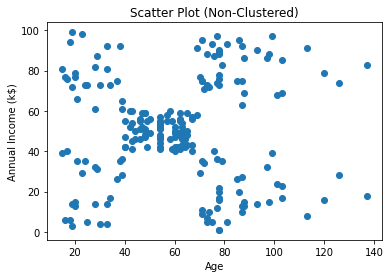

In [8]:
# Plotting Data
non_clustered_plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
non_clustered_plt.title('Scatter Plot (Non-Clustered)')
non_clustered_plt.xlabel('Age')
non_clustered_plt.ylabel('Annual Income (k$)')
non_clustered_plt.show()

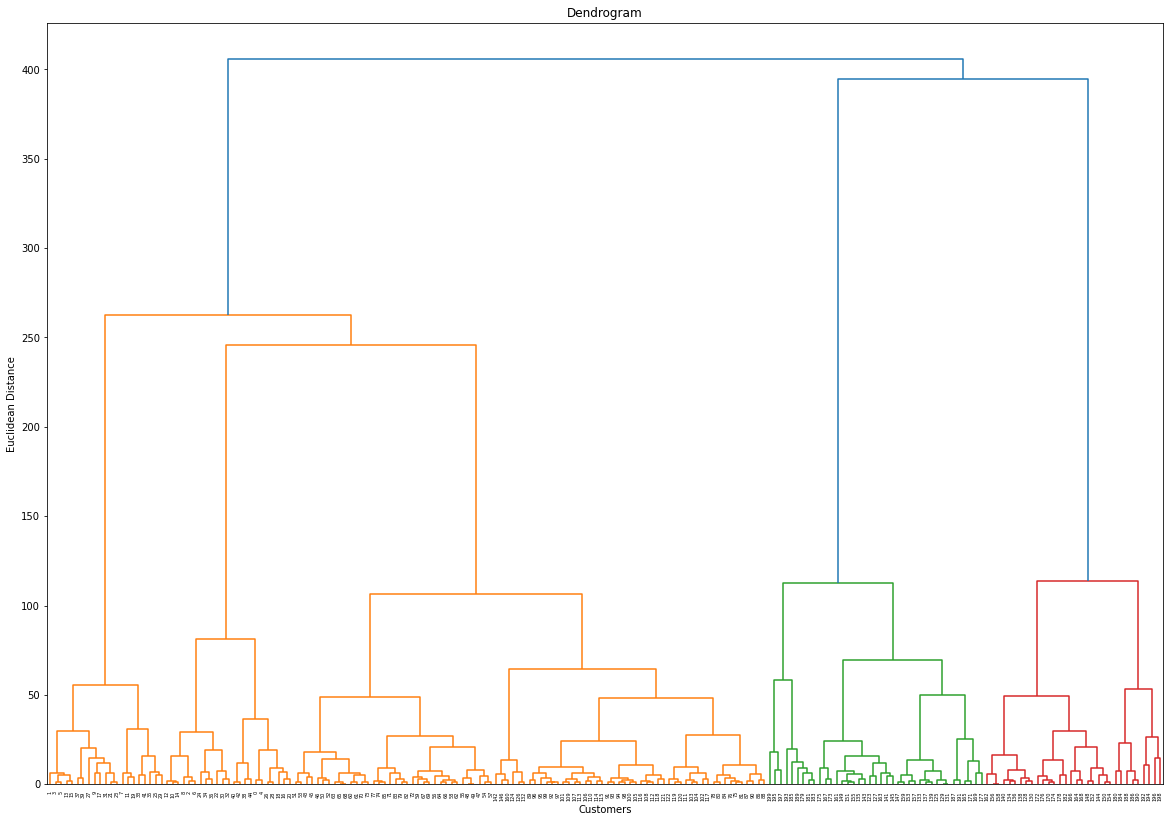

In [9]:
# Dendrogram Plot
dendrogram_plt.figure(figsize=(20, 14))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
dendrogram_plt.title('Dendrogram')
dendrogram_plt.xlabel('Customers')
dendrogram_plt.ylabel('Euclidean Distance')
dendrogram_plt.show()

In [10]:
# Hierarchical Clustering
hierarchy = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y = hierarchy.fit_predict(X)

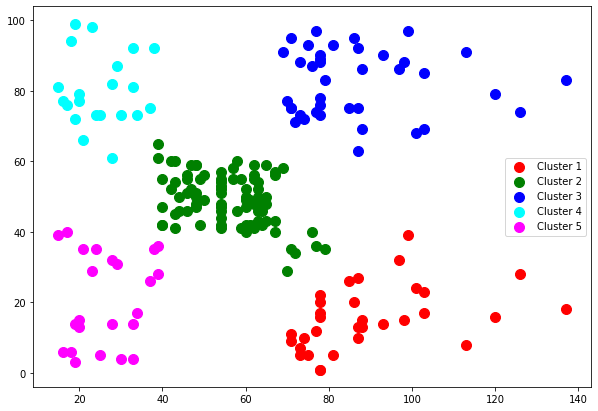

In [11]:
# Plotting Clustered Plot
clustered_plt.figure(figsize=(10, 7))
clustered_plt.scatter(X.iloc[y==0, 0], X.iloc[y==0, 1], s=100, c='red', label='Cluster 1')
clustered_plt.scatter(X.iloc[y==1, 0], X.iloc[y==1, 1], s=100, c='green', label='Cluster 2')
clustered_plt.scatter(X.iloc[y==2, 0], X.iloc[y==2, 1], s=100, c='blue', label='Cluster 3')
clustered_plt.scatter(X.iloc[y==3, 0], X.iloc[y==3, 1], s=100, c='cyan', label='Cluster 4')
clustered_plt.scatter(X.iloc[y==4, 0], X.iloc[y==4, 1], s=100, c='magenta', label='Cluster 5')
clustered_plt.legend()
clustered_plt.show()